# Loading the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# Loading images



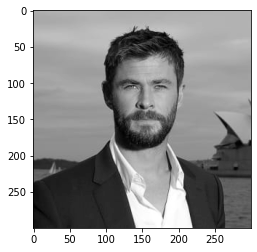

In [3]:
#  Loading the image to be tested
test_image = cv2.imread('chris.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')

OpenCV loads an image in BGR format so we would convert it into RBG format to be able to display its true colours.

In [4]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Haar cascade files

OpenCV comes with a lot of pre-trained classsifiers. For instance there are classifiers for smile, eyes,face etc. These come in the form of xml files and are located in `opencv/data/haarcascades/` folder. I have also added these pre-trained classifiers in the opencv folder

### Loading the classifier for frontal face

In [9]:
haar_cascade_face = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_alt2.xml')


# Face detection

We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h). 

In [10]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))



        

Faces found:  1


Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a green rectangle with thicknessof 2

In [11]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        

Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

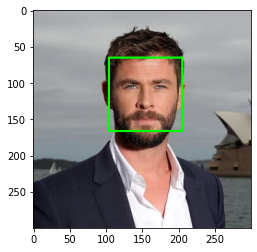

In [12]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

### Let us create a generalised function for the entire face detection process.

In [13]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy

### Testing the function on new image




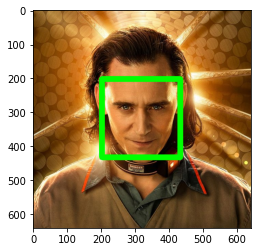

In [14]:
#loading image
test_image2 = cv2.imread('Loki.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### Testing the function on a group photograph

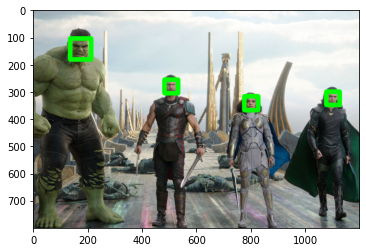

In [16]:
#loading image
test_image2 = cv2.imread('team2.jpeg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))


### Saving the Image

In [17]:
 cv2.imwrite('image1.png',faces)

True